In [1]:
#debug用

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from pprint import pprint 
from models.models import *
#自作モジュール
from models import my_cv

(4032, 3024, 3)
(202557,)
(532, 1, 2)


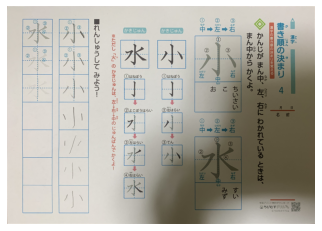

In [2]:
img_ori = cv2.imread('./sample_images/work8.png')#画像読み込み
print(np.shape(img_ori))
#my_cv.display_color(img_ori)
#紙の部分を切り出す
img_paper = my_cv.cutting_paper(img_ori)
my_cv.display_color(img_paper,output_file_path = "./tmp/paper.png")


In [3]:
img_paper = cv2.imread('./tmp/paper.png')#debug用
print(np.shape(img_paper))
paper = Paper(img_paper,"Sho","Mizu")

(2000, 2830, 3)
15


In [4]:
#scoreの取得
score1s , score2s = paper.get_scores(True)

a
a


In [6]:
for score in score1s:
    score.print_debug()

SyntaxError: invalid syntax (<ipython-input-6-7d9d0b44581e>, line 2)

In [6]:
for char in paper.char2s:
    print("====================-")

    if len(char.basic_contours) == 2:
        con = char.basic_contours[0]
        con.display()
        con.display_thresh()
        approx = con.get_approx(4,10000,30,0.01)
        print(np.shape(approx))
        my_cv.display_approx(char.img_char,approx)
        con = char.basic_contours[1]
        con.display()
        con.display_thresh()
        approx = con.get_approx(14,10000,30,0.01)
        my_cv.display_approx(char.img_char,approx)


====================-
====================-
====================-
====================-


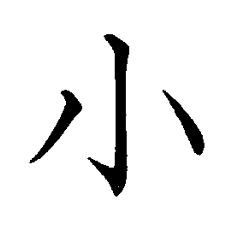

In [5]:
my_cv.display_gray(score1s[0].get_img_exp())

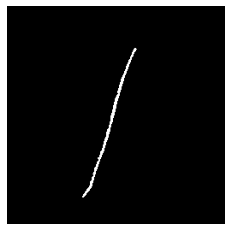

(255, 255, 3)
(255, 255, 3)


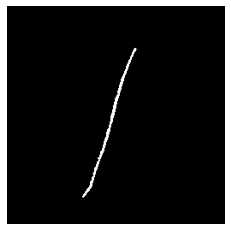

(21, 21, 3)


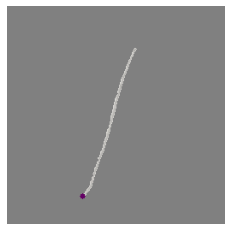

(2,)


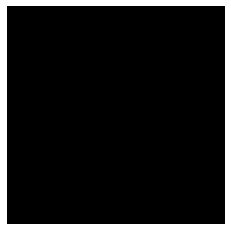

In [14]:
#rectの抽出のデバッグ
char = paper.char1s[1]
contour = char.basic_contours[1]
img_thresh = contour.img_thresh
my_cv.display_gray(contour.img_thresh)

img_thre_color = np.stack([img_thresh,img_thresh,img_thresh],axis = 2)
img = img_thre_color.reshape([255,255,3])
print(np.shape(img))
print(np.shape(img_thre_color))
my_cv.display_color(img)
dst = cv2.bitwise_and(char.img_char, img_thre_color)
right_bottom_point = [contour.max_x_point[0],contour.max_y_point[1]]#右下のポイント


width = 20
img_slice = dst[right_bottom_point[1]-width:right_bottom_point[1]+1,right_bottom_point[0]-width:right_bottom_point[0]+1,:]
print(np.shape(img_slice))

left_point = [contour.min_x_point[0],contour.min_x_point[1]]#左端のポイント
my_cv.display_point(dst,left_point)
print(np.shape(left_point))
img_fit = cv2.resize(img_slice,dsize=(40,40))



my_cv.display_color(img_fit)

In [15]:
#輪郭の精度向上 変なフィルターかまさんほうが強そう
char = paper.char1s[0]
img = np.copy(char.img_sq)
my_cv.display_color(img)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
my_cv.display_gray(hsv[:,:,2])
_, img_thresh = cv2.threshold(hsv[:,:,2], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
img_th_fltr = cv2.morphologyEx(img_thresh,cv2.MORPH_CLOSE,kernel)
#img_thresh = cv2.bitwise_not(img_thresh)
my_cv.display_gray(img_thresh)
my_cv.display_gray(img_th_fltr)

AttributeError: 'Sho' object has no attribute 'img_sq'